# 2018 KBO Mock Rookie Draft

## 1. 타자(wOBA)

## 2. 투수(FIP)

## 3. 투타통합(WAR)
    3.1 투수의 WAR은 fWAR을 기준으로 설정한다.
    3.2 타자의 WAR은 wOBA를 기준으로 설정한다.
    
## 4. 2018 KBO 신인 드래프트와의 비교

** References<br/> **
https://en.wikipedia.org/wiki/WOBA<br>
http://ko.yagongso.wikidok.net/wp-d/59e0e5f411f7fa6a3ea5545a/View
https://namu.wiki/w/WAR
https://namu.wiki/w/KBO%20%EB%A6%AC%EA%B7%B8/2018%EB%85%84/%EC%8B%A0%EC%9D%B8%EB%93%9C%EB%9E%98%ED%94%84%ED%8A%B8



## 1. 타자 (wOBA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import re

#Import data
hitter = pd.read_csv('stat/2017hitter.csv')
hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 17 columns):
순위     619 non-null int64
이름     619 non-null object
경기     619 non-null int64
타율     619 non-null float64
타석     619 non-null int64
타수     619 non-null int64
안타     619 non-null int64
2루타    619 non-null int64
3루타    619 non-null int64
홈런     619 non-null int64
타점     619 non-null int64
득점     619 non-null int64
사사구    619 non-null int64
삼진     619 non-null int64
출루율    619 non-null float64
장타율    619 non-null float64
도루     619 non-null int64
dtypes: float64(3), int64(13), object(1)
memory usage: 82.3+ KB


### Data Cleaning for Hitter 

In [2]:
#check missing value
hitter.isnull().sum()

순위     0
이름     0
경기     0
타율     0
타석     0
타수     0
안타     0
2루타    0
3루타    0
홈런     0
타점     0
득점     0
사사구    0
삼진     0
출루율    0
장타율    0
도루     0
dtype: int64

규정타석을 채우지 못한 타자들을 거를 필요가 있다 <br/>

2017년 기준
* 전반기 주말리그 7경기
* 후반기 주말리그 7경기
* 황금사자기
* 청룡선수권
* 대통령배
* 봉황대기
* 전국체전 

전국체전을 제외한 대회를 각각 2경기를 평균으로 해서 총 19경기를 소속팀 평균 경기수로 계산했다

규정타석 : 소속팀 경기수 x 0.8 x 3 = 62.4타석 <br/>
http://www.hsbaseball.kr/board/bbs_cmu_read.php?idxno=972&menu_idxno=11&page=31&search_item=&search_word=&category=

In [3]:
hitter = hitter[hitter['타석'] >= 62.4]
hitter.shape

(339, 17)

In [4]:
#단타 지표 추가
hitter['단타'] = hitter.apply(lambda x: x[6] - (x[7] + x[8] +x[9]), axis=1)
col_names = ['순위','이름','경기','타율','타석','타수','안타','단타','2루타','3루타','홈런','타점','득점','사사구','삼진','출루율','장타율','도루']
hitter = hitter.reindex(columns=col_names)
hitter.head()

,순위,이름,경기,타율,타석,타수,안타,단타,2루타,3루타,홈런,타점,득점,사사구,삼진,출루율,장타율,도루
2,3,배지환(경북고),27,0.474,120,95,45,36,3,5,1,17,31,20,10,0.556,0.642,30
8,9,강백호(서울고),31,0.434,133,106,46,30,13,0,3,34,37,27,10,0.549,0.642,10
9,10,성영래(진흥고),20,0.433,79,67,29,21,6,2,0,15,12,5,7,0.466,0.582,2
10,11,전영수(서울디자인고),17,0.431,63,51,22,17,3,1,1,4,12,11,12,0.524,0.588,11
11,12,김지훈(송탄제일고),18,0.424,79,66,28,26,1,1,0,8,18,11,7,0.494,0.470,25


### TOP 10 HITTERS by wOBA

In [6]:
#타자 종합지표 wOBA도입
hitter['wOBA'] = hitter.apply(lambda x: (0.735*x[13] + 0.9*x[7] + 1.24*x[8] + 1.56*x[9] + 1.95*x[10])/x[5], axis=1)
hitter = hitter.sort_values(by='wOBA',ascending=0)

hitter['wOBA'] = round(hitter['wOBA'],3)

## 2. 투수 (FIP)

In [7]:
pitcher = pd.read_csv('stat/2017pitcher.csv')
pitcher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 20 columns):
순위        233 non-null int64
이름(팀명)    233 non-null object
경기        233 non-null int64
승         233 non-null int64
패         233 non-null int64
세이브       233 non-null int64
이닝        233 non-null float64
타자        233 non-null int64
타수        233 non-null int64
피안타       233 non-null int64
피홈        233 non-null int64
희생        233 non-null int64
4구        233 non-null int64
사구        233 non-null int64
삼진        233 non-null int64
실점        233 non-null int64
자책        233 non-null int64
투구        233 non-null int64
S         233 non-null int64
방어율       233 non-null float64
dtypes: float64(2), int64(17), object(1)
memory usage: 36.5+ KB


### Data Cleaning for Pitcher 

In [8]:
pitcher.isnull().sum()

순위        0
이름(팀명)    0
경기        0
승         0
패         0
세이브       0
이닝        0
타자        0
타수        0
피안타       0
피홈        0
희생        0
4구        0
사구        0
삼진        0
실점        0
자책        0
투구        0
S         0
방어율       0
dtype: int64

규정이닝 : 소속팀 경기수(26) x 0.8 = 20.8이닝 <br/>

In [11]:
pitcher = pitcher[pitcher['이닝'] >= 40]
pitcher.shape

(86, 20)

**FIP  = { ( 13 x 홈런 ) + ( 3 x 볼넷 ) – ( 2 x 삼진 ) } / 이닝 + cFIP **

### TOP 10 PITCHERS BY FIP

In [12]:
#FIP = { ( 13 x HR ) + ( 3 x BB ) – ( 2 x K ) } / 이닝 + cFIP

pitcher['FIP'] = pitcher.apply(lambda x: ( (13*x[10] + 3*x[12]) - 2*x[14])/ x[6] + 3.16, axis=1)
pitcher = pitcher.sort_values(by='FIP',ascending=True)

pitcher['FIP'] = round(pitcher['FIP'],3)

## 3. 투타통합 (WAR 기준)

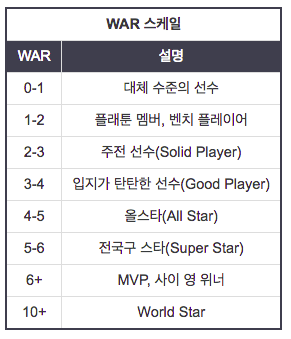

In [31]:
from IPython.display import Image
Image(filename = "pic/war_pitcher.png", width = 300)

WAR를 통한 선수가치는 위의 표와 같이 통상적으로 매겨지며, 리그 성격,경기수등에 따른 변수들에 의해 차이는 있다.

### 3.1) 투수의 WAR은 fWAR을 기준으로 설정한다

#### 3.1.1) RA(평균실점)

lgERA(리그평균자책점) = 리그자책점 / 리그경기(리그이닝수/9) <br>
lgRA(리그실점) = 리그실점 / 리그경기(리그이닝수/9) <br>
RAscale = lgERA / lgRA

RA = FIP / RAscale

#### 3.1.2) pR/W(1승에 해당하는 점수)

pR/W = [{9 * lgRA + IP/GS * RA + (9 - IP/GS) * lgRA} / 18 + 2] * 1.5

lgRA : 경기당 리그평균실점

IP/GS : 경기당 이닝 

#### 3.1.3) 피타고리안 기대승률(W%)

W% = {( lgRA/9 - RA) / pR/W} + .500

#### 3.1.4) 대체선수대비 기대 승률

대체선수대비 기대 승률 = W% - 0.325

0.325는 KBO상황을 대입하여 결정한 계수


#### 3.1.5) fWAR

fWAR = (대체 선수 대비 기대 승률) * IP/GS


http://www.kbreport.com/common/statDic/pitchingWAR
http://ko.yagongso.wikidok.net/wp-d/5a0dc4e49adb37e77efe2267/View


#### 3.1.1) RA(평균실점)

In [13]:
#리그평균실점(lgRA), 평균자책점(lgERA), RAscale

lgRA = np.sum(pitcher['실점']) / (np.sum(pitcher['이닝'] / 9))
lgERA = np.sum(pitcher['자책']) / (np.sum(pitcher['이닝'] / 9))
RAscale = lgERA / lgRA

print('lgRA = ',lgRA)
print('lgERA = ',lgERA)
print('RAscale = ',RAscale)

lgRA =  4.197607178464606
lgERA =  3.119042871385843
RAscale =  0.7430525865754597


In [14]:
pitcher['RA'] = pitcher.apply(lambda x: x[20]/RAscale, axis=1)
pitcher['RA'] = round(pitcher['RA'],3)

#### 3.1.2) pR/W(1승에 해당하는 점수)

In [15]:
pitcher['pR/W'] = pitcher.apply(lambda x: ((9 * lgRA + (x[6]/9) * (x[20] / RAscale) + (9 - (x[6]/x[2])) * lgRA) / 18 + 2) * 1.5, axis=1 )
pitcher['pR/W'] = round(pitcher['pR/W'],3)

#### 3.1.3) 피타고리안 기대승률(W%)

In [16]:
pitcher['W%'] = pitcher.apply(lambda x: ((lgRA - x[21]) / x[22]) + .500, axis=1 )
pitcher['W%'] = round(pitcher['W%'],3)

#### 3.1.4) 대체선수대비 기대승률(wW%)

In [17]:
pitcher['wW%'] = pitcher.apply(lambda x: x[23] - .325, axis=1 )
pitcher['wW%'] = round(pitcher['wW%'],3)

#### 3.1.5) Pitcher WAR(fWAR)

In [18]:
#fWAR = (대체 선수 대비 기대 승률) * IP/GS
pitcher['fWAR'] = pitcher.apply(lambda x: x[24] * (x[6]/9), axis=1 )
pitcher['fWAR'] = round(pitcher['fWAR'],3)

#rerank by fWAR
pitcher = pitcher.sort_values(by='fWAR',ascending=False)
pitcher['순위'] = pitcher['fWAR'].rank(ascending=False)
pitcher['순위'] = pitcher['순위'].astype(int)

pitcher.head()

,순위,이름(팀명),경기,승,패,세이브,이닝,타자,타수,피안타,...,자책,투구,S,방어율,FIP,RA,pR/W,W%,wW%,fWAR
6,1,최민준(경남고),30,11,1,0,81.0,315,279,42,...,10,1148,0,1.111,1.617,2.176,9.984,0.702,0.377,3.393
53,2,김재균(충암고),25,11,0,0,115.2,476,407,92,...,29,1825,0,2.257,2.422,3.260,11.161,0.584,0.259,3.315
14,3,신민혁(야탑고),23,8,3,0,81.2,307,281,49,...,13,1090,0,1.433,1.756,2.363,9.838,0.686,0.361,3.257
117,4,윤강찬(김해고),13,4,4,0,66.1,276,247,64,...,26,994,0,3.529,1.420,1.911,8.687,0.763,0.438,3.217
104,5,김범수(율곡고),25,8,2,0,87.1,350,316,79,...,32,1273,0,3.299,1.932,2.600,10.175,0.657,0.332,3.213


fWAR을 기준으로 했을때 **최민준,신민혁,김범수,윤강찬,이승헌** 순으로 정상급 투수들로 분류되었다. 

MLB WAR 스케일의 기준으로는 Solid Player 혹은 Good Player 수준으로 분류 되었다.

하지만 위 자료의 MLB의 기준이므로 보정의 필요가 있다.

Ref: https://namu.wiki/w/WAR

### 3.2) 타자의 WAR은 wOBA를 기준으로 설정한다

#### 3.2.1) Batting RAR(Runs Above Replacement level)
    
- wRAA = ((wOBA - 리그평균 wOBA) / wOBA Scale) * 타석
* RAR = RAA + 20 (PA / 600)


wOBA를 출루율 스케일로 나타내기 위해 각 이벤트(볼넷, HBP, 1루타, 2루타, 3루타, 홈런)에 곱하는 값. 이 역시 매 시즌 값이 변경되며 2012시즌 wOBA스케일은 1.245다. wOBA를 구할때 인위적으로 곱했기 때문에 다시 나누는 것. 참고로 이것도 톰 탱고의 The Book에 나온 오리지날 수치가 있는데 바로 1.15다

- RAR = 타격에서의 기여도(BRAR)

해당 지표에서는 타격에 대한 기여도만 고려할 수 있는 상황으로 나머지 지표는 제외한다.<br>
(기존은 RAR = (타격에서의 기여도(BRAR)) + (수비에서의 기여도) + (포지션에 따른 조정) + (주루에서의 기여도))


#### 3.2.2) WAR = RAR / 10  

- (R/W) 이 경우 R/W은 1승에 해당하는 득점을 10으로 통일한다)<br>
   
http://www.kbreport.com/common/statDic/positionPlayerWAR

#### 3.2) Hitter WAR

In [19]:
#리그평균 wOBA구하기
hitter['lgwOBA'] = np.mean(hitter['wOBA'])
hitter['lgwOBA'] = round(hitter['lgwOBA'], 3)

In [20]:
hitter['WAR'] = hitter.apply(lambda x: (( (((x[18] - x[19]) / 1.15) * x[4]) + (20 * x[4] / 600)) / 10), axis=1)
hitter = hitter.sort_values(by='WAR',ascending=False)

hitter['WAR'] = round(hitter['WAR'], 3)

#rerank by fWAR
hitter = hitter.sort_values(by='WAR',ascending=False)
hitter['순위'] = hitter['WAR'].rank(ascending=False)
hitter['순위'] = hitter['순위'].astype(int)

hitter.head()

,순위,이름,경기,타율,타석,타수,안타,단타,2루타,3루타,...,타점,득점,사사구,삼진,출루율,장타율,도루,wOBA,lgwOBA,WAR
8,1,강백호(서울고),31,0.434,133,106,46,30,13,0,...,34,37,27,10,0.549,0.642,10,0.649,0.427,3.011
23,2,김민기(덕수고),30,0.393,124,89,35,25,8,1,...,13,27,31,10,0.545,0.539,13,0.660,0.427,2.926
12,3,최현준(서울고),31,0.423,141,111,47,38,6,3,...,25,40,28,13,0.536,0.532,20,0.603,0.427,2.628
2,4,배지환(경북고),27,0.474,120,95,45,36,3,5,...,17,31,20,10,0.556,0.642,30,0.638,0.427,2.602
63,5,김다운(율곡고),25,0.353,115,85,30,18,8,4,...,14,34,29,7,0.518,0.541,4,0.631,0.427,2.423


**강백호, 김민기, 최현준, 배지환, 김다운** 순으로 위 기준에서 **좋은 야수**로 분리된다

그러나 이는 KBO기준이므로 상대적으로 경기가 적은 고교야구에서는 WAR기준을 낮출 필요가 있다.

Ref : http://www.kbreport.com/common/statDic/positionPlayerWAR

## 4. 2018 KBO 신인 드래프트와의 비교

### 4.1 Data Cleaning

In [21]:
df_pc = pd.read_csv('draft/pitcher_draft.csv')
df_ht = pd.read_csv('draft/hitter_draft.csv')

- 비교불필요값 제거(대학선수)

In [22]:
df_ht = df_ht[~df_ht.학교.str.endswith('대학교')]
df_pc = df_pc[~df_pc.학교.str.endswith('대학교')]

- Top 30 재정렬(고교선수 기준)

In [23]:
#투수
df_pc['순위'] = df_pc['순위'].rank()
df_pc['순위'] = df_pc['순위'].astype(int)
over30_pc = df_pc[df_pc['순위'] > 30]
df_pc = df_pc.drop(over30_pc.index, axis=0)

#타자
df_ht['순위'] = df_ht['순위'].rank()
df_ht['순위'] = df_ht['순위'].astype(int)
over30_ht = df_ht[df_ht['순위'] > 30]
df_ht = df_ht.drop(over30_ht.index, axis=0)

In [24]:
df_pc.shape

(30, 4)

### 4.2 Regex (정규표현식)

In [25]:
pitcher['이름'] = pitcher['이름(팀명)']

#subtract value in '이름' into '학교'
pitcher['학교'] = pitcher.iloc[:,1].str.extract('([^)가-힣]\w{0,})',expand=False) 
pitcher['학교'] = pitcher['학교'].map(lambda x: str(x)[1:])

hitter['학교'] = hitter.iloc[:,1].str.extract('([^)가-힣]\w{0,})',expand=False) 
hitter['학교'] = hitter['학교'].map(lambda x: str(x)[1:])

#reorder columns
pitcher = pitcher[['순위','이름','학교','FIP','fWAR']]
hitter = hitter[['순위','이름','학교','wOBA','WAR']]

#rearrange value in 이름(팀명)
pitcher['이름'] = pitcher['이름'].str[:3]
hitter['이름'] = hitter['이름'].str[:3]

In [26]:
pitcher.head()

,순위,이름,학교,FIP,fWAR
6,1,최민준,경남고,1.617,3.393
53,2,김재균,충암고,2.422,3.315
14,3,신민혁,야탑고,1.756,3.257
117,4,윤강찬,김해고,1.420,3.217
104,5,김범수,율곡고,1.932,3.213


In [27]:
hitter.head()

,순위,이름,학교,wOBA,WAR
8,1,강백호,서울고,0.649,3.011
23,2,김민기,덕수고,0.660,2.926
12,3,최현준,서울고,0.603,2.628
2,4,배지환,경북고,0.638,2.602
63,5,김다운,율곡고,0.631,2.423


### 4.3 매칭 정확도 by WAR 

#### 4.3.1 완벽일치 (선수 포함, 순위 일치)

#### 4.3.2 부분적 일치 (선수 포함, 순위 불일치)

In [28]:
df_ht['선수일치'] = df_ht['이름'].isin(hitter['이름']).astype(str)
df_ht.head()

,순위,이름,학교,포지션,선수일치
0,1,강백호,서울고,포수,True
1,2,김형준,세광고,포수,True
2,3,이재원,서울고,외야수,True
3,4,예진원,경남고,외야수,True
4,5,오영수,오영수,내야수,True


In [29]:
df_pc['선수일치'] = df_pc['이름'].isin(pitcher['이름']).astype(str)
df_pc.head()

,순위,이름,학교,포지션,선수일치
0,1,양창섭,덕수고,투수,True
1,2,이승헌,용마고,투수,True
2,3,이승관,야탑고,투수,False
3,4,조성훈,청원고,투수,True
4,5,김유신,세광고,투수,False


#### 4.3.2 불일치 (선수 불포함, 순위 불일치)

### 4.4 Results of TOP 30

#### 4.4.1 완벽 일치 

#### 4.4.2 부분적 일치

<function matplotlib.pyplot.show(*args, **kw)>

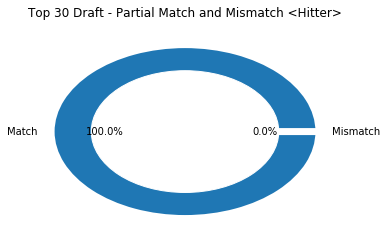

In [85]:
#count data hitter
partial_count = pd.value_counts(df_ht['선수일치'],"True")
partial_true = partial_count["True"]
partial_false = 0

#partial_true = 30 (full match)

#pie graph
names = "Match", "Mismatch"
size_partial = [partial_true,partial_false]

#import library
import matplotlib.pyplot as pyplt

pyplt.pie(size_partial, labels = names, autopct='%.1f%%',wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' } )
pyplt.title("Top 30 Draft - Partial Match and Mismatch <Hitter>")

circle = pyplt.Circle ( (0,0), 0.7, color = "white")
p = pyplt.gcf()
p.gca().add_artist(circle)

pyplt.show

<function matplotlib.pyplot.show(*args, **kw)>

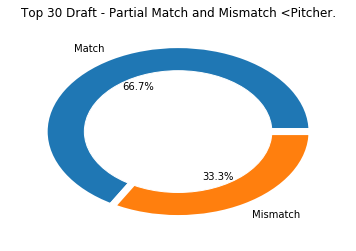

In [86]:
#count data pitcher
partial_count = pd.value_counts(df_pc['선수일치'])
partial_true = partial_count["True"]
partial_false = partial_count["False"]

#pie graph
names = "Match", "Mismatch"
size_partial = [partial_true,partial_false]

#import library
import matplotlib.pyplot as pyplt

pyplt.pie(size_partial, labels = names, autopct='%.1f%%',wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' } )
pyplt.title("Top 30 Draft - Partial Match and Mismatch <Pitcher.")

circle = pyplt.Circle ( (0,0), 0.7, color = "white")
p = pyplt.gcf()
p.gca().add_artist(circle)

pyplt.show

#### 4.4.3 불일치